In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
dataset = pd.read_csv('./src/Cancer_Data.csv', usecols=range(0, 32))
dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df = dataset.iloc[:,1:]
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# sns.pairplot(data=dataset, hue='diagnosis')

### Standradize

In [11]:
from sklearn.model_selection import train_test_split
X , y = dataset.iloc[:, 2:] , dataset.iloc[:, 1]
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
X_train_std.shape , X_test_std.shape

((455, 30), (114, 30))

In [22]:
X_train_std[0].shape

(30,)

### Covariance

In [24]:
cov = np.cov(X_train_std.T)
# print(f'Covariance matrix',cov)
eigen_vals , eigen_vectors = np.linalg.eig(cov)
print('\nEigen Values \n%s' % eigen_vals)



Eigen Values 
[1.33930717e+01 5.57571543e+00 2.97904280e+00 1.95900833e+00
 1.61586009e+00 1.15623141e+00 7.00902148e-01 4.78305152e-01
 4.24937726e-01 3.50601088e-01 2.88646838e-01 2.67394294e-01
 2.31694517e-01 1.38184332e-01 9.43737708e-02 8.05256209e-02
 6.20906208e-02 5.69271854e-02 4.87748282e-02 1.17259735e-04
 7.38330596e-04 1.66080877e-03 6.61030574e-03 8.34073714e-03
 3.17258588e-02 2.86035956e-02 2.73649765e-02 2.52252188e-02
 1.80252066e-02 1.53791459e-02]


In [26]:
len(eigen_vals)

30

In [25]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)] ## variance explained ratio
cum_var_exp = np.cumsum(var_exp)

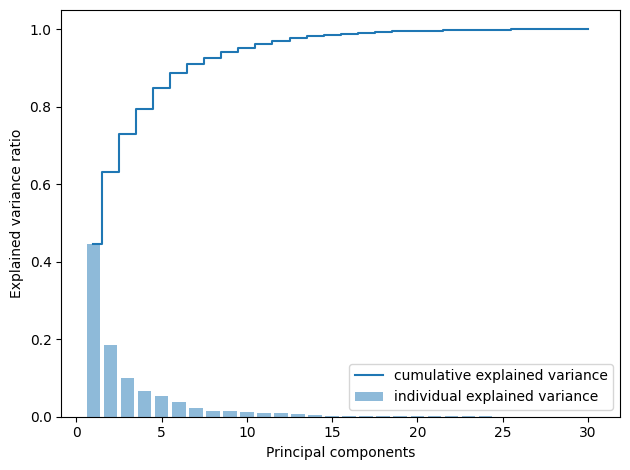

In [27]:
plt.bar(range(1, 31), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 31), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [36]:
# sort descending order of eingenvalues(from most important to least important)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vectors[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k : k[0], reverse=True)
eigen_pairs[0][1]

array([-0.21700113, -0.10103002, -0.22585165, -0.21964363, -0.1561959 ,
       -0.24193688, -0.25889011, -0.26143472, -0.13832939, -0.07436211,
       -0.2030525 , -0.020468  , -0.20788898, -0.19972655, -0.01992919,
       -0.17317613, -0.15096502, -0.18121901, -0.05084007, -0.10009746,
       -0.22708814, -0.10192589, -0.23540865, -0.22491863, -0.13315782,
       -0.21061758, -0.22843828, -0.24885267, -0.12384352, -0.13266677])

In [38]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis])) # stacking the top 2 eigen vectors
print('Matrix W:\n', W)


Matrix W:
 [[-0.21700113 -0.23848702]
 [-0.10103002 -0.05976105]
 [-0.22585165 -0.21945099]
 [-0.21964363 -0.23422535]
 [-0.1561959   0.17727149]
 [-0.24193688  0.14168731]
 [-0.25889011  0.05924065]
 [-0.26143472 -0.04050914]
 [-0.13832939  0.19046021]
 [-0.07436211  0.36643469]
 [-0.2030525  -0.1030786 ]
 [-0.020468    0.0950226 ]
 [-0.20788898 -0.09074368]
 [-0.19972655 -0.15203575]
 [-0.01992919  0.20290395]
 [-0.17317613  0.23613762]
 [-0.15096502  0.20390885]
 [-0.18121901  0.13498372]
 [-0.05084007  0.18212233]
 [-0.10009746  0.28454191]
 [-0.22708814 -0.22270234]
 [-0.10192589 -0.04776171]
 [-0.23540865 -0.20330198]
 [-0.22491863 -0.2204665 ]
 [-0.13315782  0.16501914]
 [-0.21061758  0.13276046]
 [-0.22843828  0.09625091]
 [-0.24885267 -0.01153609]
 [-0.12384352  0.13520559]
 [-0.13266677  0.27039945]]


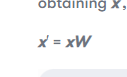

In [39]:
X_train_pca = X_train_std.dot(W)

In [40]:
X_train_pca[0]

array([3.21738849, 0.2499005 ])

In [46]:
y_train[0] == 'M'

True

In [48]:
True == 1

True

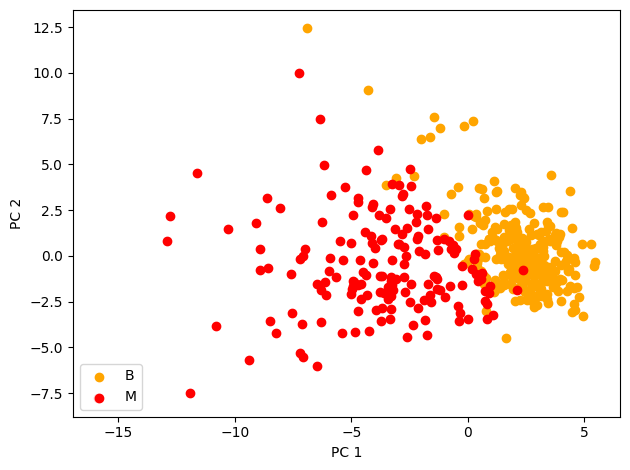

In [43]:
colors = ['orange', 'r']
for l , c in zip(np.unique(y_train), colors):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l) ## true =1, false =0
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

hmm dont look good

### PCA with SKlearn

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
x_test_pca = pca.transform(X_test_std)


In [51]:
X_train_pca.shape , X_train_std.shape   

((455, 2), (455, 30))

<AxesSubplot: >

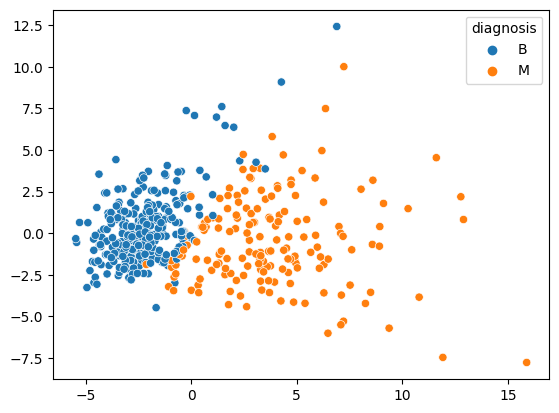

In [52]:
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train)


In [60]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train_pca, y_train)
y = [1 if i == 'M' else 0 for i in y_train]


where pca.components_ represents the eigenvectors and pca.explained_variance_ represents the eigenvalues:

In [70]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
x_test_pca = pca.transform(X_test_std)

In [71]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
sklearn_loadings[:5]


array([[ 7.94149171e-01, -5.63138272e-01, -5.47018595e-04,
        -6.17694253e-02,  5.04320581e-02,  3.83530861e-02,
        -1.06384967e-01, -2.95086796e-02, -1.45304828e-01,
        -3.51859882e-02,  1.87843783e-02,  2.90556347e-02,
         1.05331008e-02,  1.71339495e-02,  3.14637126e-02,
        -4.21884697e-02,  4.39373460e-02,  4.01911584e-02,
        -4.87366956e-02,  6.07634646e-03, -5.62713548e-03,
        -1.95024729e-02, -1.94360729e-02,  2.22260538e-02,
        -2.44653040e-04, -1.40338967e-02, -7.88259013e-03,
         7.90116616e-03,  6.57519377e-03, -7.53818460e-03],
       [ 3.69734984e-01, -1.41113475e-01,  8.84205828e-02,
         8.61064918e-01,  1.08839707e-02, -5.71497115e-02,
         1.07451102e-02,  1.13710578e-01,  1.96891006e-02,
        -1.43839005e-01, -1.63844129e-01,  1.04852251e-01,
         9.27395615e-02, -1.72067702e-02,  3.82892530e-02,
        -3.59434902e-02, -1.69995867e-02, -1.24987347e-02,
         2.47437236e-04,  7.41903804e-02, -4.14716128e-

In [72]:
pca.components_.shape

(30, 30)

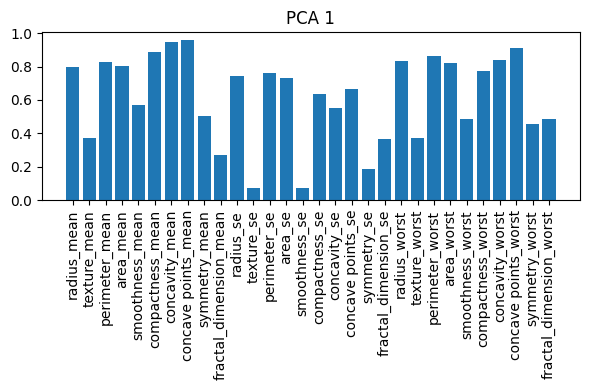

In [74]:
fig , ax = plt.subplots(figsize=(6,4))
ax.bar(range(1, 31), sklearn_loadings[:,0], align='center')
ax.set_xticks(range(1, 31))
ax.set_xticklabels(dataset.columns[2:], rotation=90)
# plt.ylim([-1,1])
plt.title('PCA 1')
plt.tight_layout()
plt.show()


In [ ]:
dataset

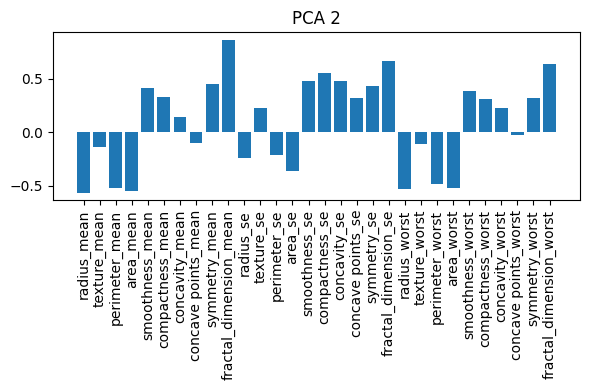

In [76]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(range(1, 31), sklearn_loadings[:, 1], align='center')
ax.set_xticks(range(1, 31))
ax.set_xticklabels(dataset.columns[2:], rotation=90)
# plt.ylim([-1,1])
plt.title('PCA 2')
plt.tight_layout()
plt.show()


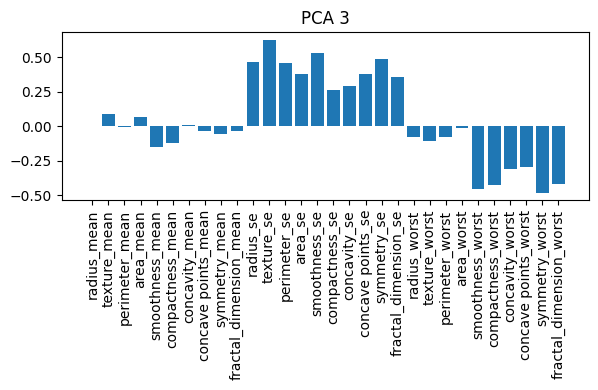

In [77]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(range(1, 31), sklearn_loadings[:, 2], align='center')
ax.set_xticks(range(1, 31))
ax.set_xticklabels(dataset.columns[2:], rotation=90)
# plt.ylim([-1,1])
plt.title('PCA 3')
plt.tight_layout()
plt.show()


Note that a value of 1 describes a perfect positive correlation whereas a value of –1 corresponds to a perfect negative correlation

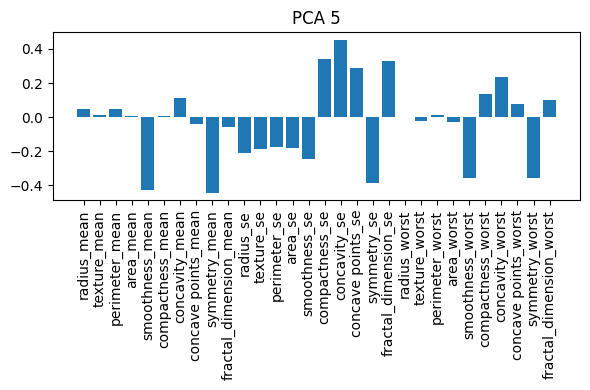

In [78]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(range(1, 31), sklearn_loadings[:, 4], align='center')
ax.set_xticks(range(1, 31))
ax.set_xticklabels(dataset.columns[2:], rotation=90)
# plt.ylim([-1,1])
plt.title('PCA 5')
plt.tight_layout()
plt.show()


In [80]:
sklearn_loadings[:, 4].shape


(30,)

In [81]:
np.abs(sklearn_loadings[:, 4])


array([0.05043206, 0.01088397, 0.04825818, 0.00943375, 0.42908589,
       0.007384  , 0.11435544, 0.0381311 , 0.44173753, 0.05669844,
       0.21141047, 0.18633344, 0.17664024, 0.17959363, 0.24797959,
       0.34058658, 0.45239241, 0.288361  , 0.38795343, 0.33041956,
       0.00170791, 0.02333206, 0.01129892, 0.03083656, 0.35714218,
       0.13436289, 0.23510687, 0.07959957, 0.35612029, 0.10105092])

In [82]:
x = [(i,d) for i , d in enumerate(np.abs(sklearn_loadings[:, 4]))]

In [84]:
x.sort(key=lambda k : k[1], reverse=True)

In [86]:
x[:4]

[(16, 0.45239241322507545),
 (8, 0.44173752909150343),
 (4, 0.42908588925165997),
 (18, 0.3879534298072263)]

In [91]:
dataset.columns[[17, 9,5, 19]]

Index(['compactness_se', 'concave points_mean', 'area_mean',
       'concave points_se'],
      dtype='object')